# Python Mini Assessment

**EC1B1 – Winter Term 2025/2026**

<div style="font-family: system-ui; padding: 20px 30px 20px 20px; background-color: #FFFFFF; border-left: 8px solid #0570b0; border-radius: 8px; box-shadow: 0 4px 12px rgba(0, 0, 0, 0.1);max-width:600px;color:#212121;">

**Mini Assessment Notebook**
- 📅 Date: 17/02/2026
- 👤 Name: Xuanyang Ji
- 🎯 Purpose: 

</div>

**Importing libraries**

To run the notebook, we need first import all the libraries below

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, MaxNLocator

## Section 1: Importing Data

In this project, the raw data are stored on GitHub, which allows the Excel file to be read directly from its URL without first converting it into a byte stream.

In [ ]:
url = "https://raw.githubusercontent.com/jxy-ygjm/EC1B1-Mini-Assessment/main/data/raw/PWT_EC1B1_2025.xlsx"

In [24]:
# Read all sheets from the Excel file
all_sheets = pd.read_excel(url, sheet_name=None)

# Create a dictionary to store the selected sheets
selected_sheets = {}

# Select sheets starting from the third one
for sheet in list(all_sheets.keys())[2:]:
    selected_sheets[sheet] = all_sheets[sheet]

In [25]:
# Explore the structure of the selected sheets
for key in selected_sheets.keys():
    df = selected_sheets[key]
    print(f"Sheet name:{key}\nColumns in {key}: {list(df.columns)}\n")

Sheet name:rgdpna
Columns in rgdpna: ['countrycode', 'country', 'currency_unit', 'year', 'rgdpna']

Sheet name:rnna
Columns in rnna: ['countrycode', 'year', 'rnna']

Sheet name:emp
Columns in emp: ['countrycode', 'year', 'emp']

Sheet name:hc
Columns in hc: ['countrycode', 'year', 'hc']

Sheet name:pop
Columns in pop: ['countrycode', 'year', 'pop']

Sheet name:labsh
Columns in labsh: ['countrycode', 'year', 'labsh']



As we can see, in the columns of each sheet, we have `countrycode` and `year`, we will use them to merge our data

In [26]:
# Setup for final dataframe
df = selected_sheets["rgdpna"]

# Merge the remaining sheets into the final dataframe
for key in list(selected_sheets.keys())[1:]:
    df = pd.merge(
        df,
        selected_sheets[key],
        on=["countrycode", "year"],
        how="left"
    )

In [27]:
df

,countrycode,country,currency_unit,year,rgdpna,rnna,emp,hc,pop,labsh
0,AGO,Angola,Kwanza,1970,54237.054688,295517.625000,3.666207,1.015686,5.890365,0.284385
1,AGO,Angola,Kwanza,1971,57491.277344,314195.093750,3.742484,1.018196,6.040777,0.284385
2,AGO,Angola,Kwanza,1972,57606.261719,332435.843750,3.853271,1.020712,6.248552,0.284385
3,AGO,Angola,Kwanza,1973,62272.367188,352647.906250,3.987807,1.023234,6.496962,0.284385
4,AGO,Angola,Kwanza,1974,64202.808594,373267.718750,4.130696,1.025762,6.761380,0.284385
...,...,...,...,...,...,...,...,...,...,...
7745,ZWE,Zimbabwe,US Dollar,2015,42008.199219,64916.476562,6.393752,2.584653,13.814629,0.533381
7746,ZWE,Zimbabwe,US Dollar,2016,42325.726562,66257.859375,6.504374,2.616257,14.030331,0.533381
7747,ZWE,Zimbabwe,US Dollar,2017,44316.742188,67627.562500,6.611773,2.648248,14.236595,0.533381
7748,ZWE,Zimbabwe,US Dollar,2018,46457.097656,69059.625000,6.714952,2.680630,14.438802,0.533381


## Section 2: Data Cleaning

In [ ]:
# Drop the "pop" and "labsh" columns
df = df.drop(columns=["pop", "labsh"])

In [ ]:
# Filter empty "emp" values
empty_emp_rows = df[df["emp"].isnull()]
empty_emp_rows

,countrycode,country,currency_unit,year,rgdpna,rnna,emp,hc
1918,DAV,Davidland,Dave Bucks,2000,297615.966975,NaN,NaN,NaN
1919,DAV,Davidland,Dave Bucks,2001,406081.830039,NaN,NaN,NaN
1920,DAV,Davidland,Dave Bucks,2002,280928.632931,NaN,NaN,NaN
1921,DAV,Davidland,Dave Bucks,2003,414515.462764,NaN,NaN,NaN
1922,DAV,Davidland,Dave Bucks,2004,318230.406660,NaN,NaN,NaN
1923,DAV,Davidland,Dave Bucks,2005,393447.098524,NaN,NaN,NaN
1924,DAV,Davidland,Dave Bucks,2006,365408.899996,NaN,NaN,NaN
1925,DAV,Davidland,Dave Bucks,2007,290036.306425,NaN,NaN,NaN
1926,DAV,Davidland,Dave Bucks,2008,380500.602547,NaN,NaN,NaN
1927,DAV,Davidland,Dave Bucks,2009,302530.516234,NaN,NaN,NaN


In [ ]:
# Filter out rows where "country" is "Davidland"
df = df[df["country"] != "Davidland"]

# Drop rows with empty "emp" values
df = df.dropna(subset=["emp"])

In [ ]:
# Check whether there are any remaining rows with empty "emp" values
df[df["emp"].isnull()]

,countrycode,country,currency_unit,year,rgdpna,rnna,emp,hc


In [32]:
# Display rows with any remaining missing values
df[df.isnull().any(axis=1)]

,countrycode,country,currency_unit,year,rgdpna,rnna,emp,hc
6872,THA,Thailand,Baht,2002,NaN,4238599.5,33.048218,2.300559
6886,THA,Thailand,Baht,2016,NaN,5411272.5,37.614361,2.714251
7423,USA,United States,US Dollar,2014,NaN,64124212.0,148.220642,3.722829


In [ ]:
# Set to display all rows
pd.set_option("display.max_rows", None)

# Show rows for Thailand and USA
df[(df["country"] == "Thailand") | (df["country"] == "United States")]

,countrycode,country,currency_unit,year,rgdpna,rnna,emp,hc
6820,THA,Thailand,Baht,1950,2.566126e+04,1.262866e+05,9.319422,1.211704
6821,THA,Thailand,Baht,1951,2.446944e+04,1.295146e+05,9.541947,1.224768
6822,THA,Thailand,Baht,1952,2.385033e+04,1.331645e+05,9.771986,1.237972
6823,THA,Thailand,Baht,1953,2.153738e+04,1.369374e+05,10.015853,1.251319
6824,THA,Thailand,Baht,1954,2.359528e+04,1.410691e+05,10.276541,1.264810
6825,THA,Thailand,Baht,1955,2.188879e+04,1.461986e+05,10.553393,1.278447
6826,THA,Thailand,Baht,1956,2.292072e+04,1.499628e+05,10.837636,1.291734
6827,THA,Thailand,Baht,1957,2.618970e+04,1.567834e+05,11.119027,1.305160
6828,THA,Thailand,Baht,1958,2.670479e+04,1.636753e+05,11.398319,1.318726
6829,THA,Thailand,Baht,1959,2.972478e+04,1.729479e+05,11.680796,1.332432


In [34]:
# Reset display options to default
pd.reset_option("display.max_rows")

In [ ]:
# Fill missing values in "rgdpna" using linear interpolation with limit=1
df["rgdpna"] = df["rgdpna"].interpolate(method="linear", limit_direction="both", limit=1)

In [40]:
# Display rows with any remaining missing values
df[df.isnull().any(axis=1)]

,countrycode,country,currency_unit,year,rgdpna,rnna,emp,hc


In [ ]:
# Display the cleaned and processed DataFrame
df

,countrycode,country,currency_unit,year,rgdpna,rnna,emp,hc
0,AGO,Angola,Kwanza,1970,54237.054688,295517.625000,3.666207,1.015686
1,AGO,Angola,Kwanza,1971,57491.277344,314195.093750,3.742484,1.018196
2,AGO,Angola,Kwanza,1972,57606.261719,332435.843750,3.853271,1.020712
3,AGO,Angola,Kwanza,1973,62272.367188,352647.906250,3.987807,1.023234
4,AGO,Angola,Kwanza,1974,64202.808594,373267.718750,4.130696,1.025762
...,...,...,...,...,...,...,...,...
7745,ZWE,Zimbabwe,US Dollar,2015,42008.199219,64916.476562,6.393752,2.584653
7746,ZWE,Zimbabwe,US Dollar,2016,42325.726562,66257.859375,6.504374,2.616257
7747,ZWE,Zimbabwe,US Dollar,2017,44316.742188,67627.562500,6.611773,2.648248
7748,ZWE,Zimbabwe,US Dollar,2018,46457.097656,69059.625000,6.714952,2.680630


In [42]:
# Rename columns for better readability
df.rename(
    columns={
        "rgdpna": "Real GDP",
        "rnna": "Capital",
        "emp": "Labour",
        "hc": "Human Capital",
    },
    inplace=True
)

In [43]:
# Drop the "countrycode" column
df = df.drop(columns=["countrycode"])

In [44]:
# Display the final cleaned and processed DataFrame
df

,country,currency_unit,year,Real GDP,Capital,Labour,Human Capital
0,Angola,Kwanza,1970,54237.054688,295517.625000,3.666207,1.015686
1,Angola,Kwanza,1971,57491.277344,314195.093750,3.742484,1.018196
2,Angola,Kwanza,1972,57606.261719,332435.843750,3.853271,1.020712
3,Angola,Kwanza,1973,62272.367188,352647.906250,3.987807,1.023234
4,Angola,Kwanza,1974,64202.808594,373267.718750,4.130696,1.025762
...,...,...,...,...,...,...,...
7745,Zimbabwe,US Dollar,2015,42008.199219,64916.476562,6.393752,2.584653
7746,Zimbabwe,US Dollar,2016,42325.726562,66257.859375,6.504374,2.616257
7747,Zimbabwe,US Dollar,2017,44316.742188,67627.562500,6.611773,2.648248
7748,Zimbabwe,US Dollar,2018,46457.097656,69059.625000,6.714952,2.680630


## Section 3: Simple Visualisations

### 3.1: Basic Charts

In [ ]:
# Filter data for Finland
finland_data = df[df["country"] == "Finland"]

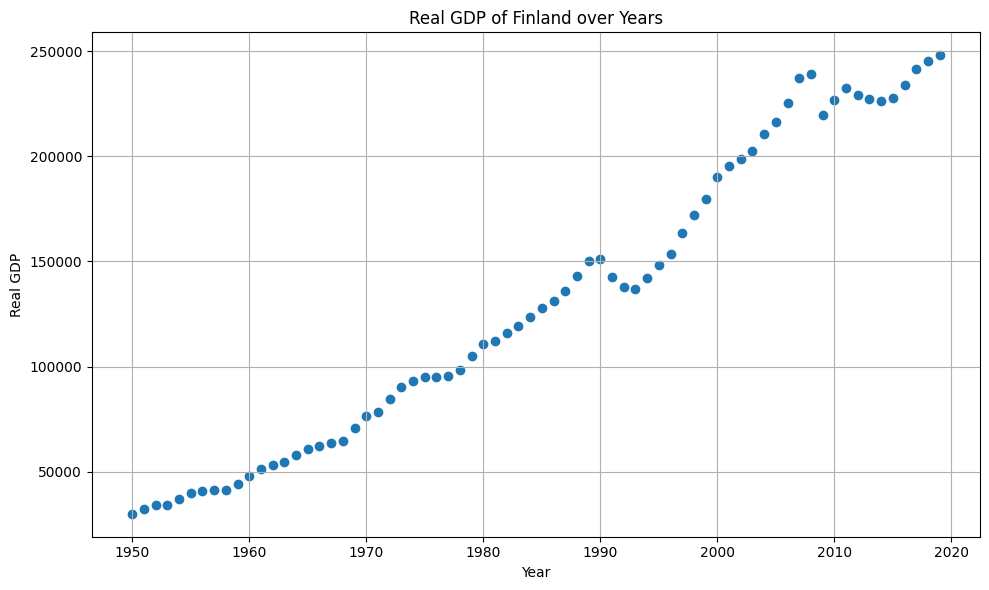

In [ ]:
# Create the scatterplot
plt.figure(figsize=(10, 6))

plt.scatter(finland_data["year"], finland_data["Real GDP"])

plt.title("Real GDP of Finland over Years")
plt.xlabel("Year")
plt.ylabel("Real GDP")

plt.grid(True)
plt.tight_layout()
plt.show()

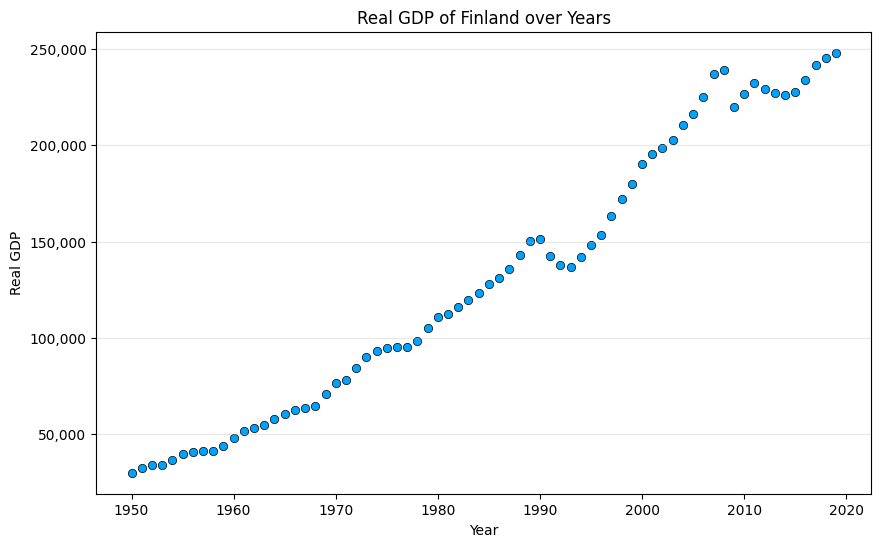

In [ ]:
# Create the scatterplot
fig, ax = plt.subplots(figsize=(10, 6))

# Customise the data points with a specific color and edge
ax.scatter(
    finland_data["year"], 
    finland_data["Real GDP"], 
    facecolor="#00a2ff", 
    edgecolor='black', 
    linewidth=0.5
)

ax.set_title("Real GDP of Finland over Years")
ax.set_xlabel("Year")
ax.set_ylabel("Real GDP")

# Remove vertical grid lines and make horizontal ones faint
ax.grid(axis="y", alpha=0.3) 

# Format y-axis with comma separators
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

plt.show()

In [ ]:
# Filter data for France
france_data = df[df["country"] == 'France']

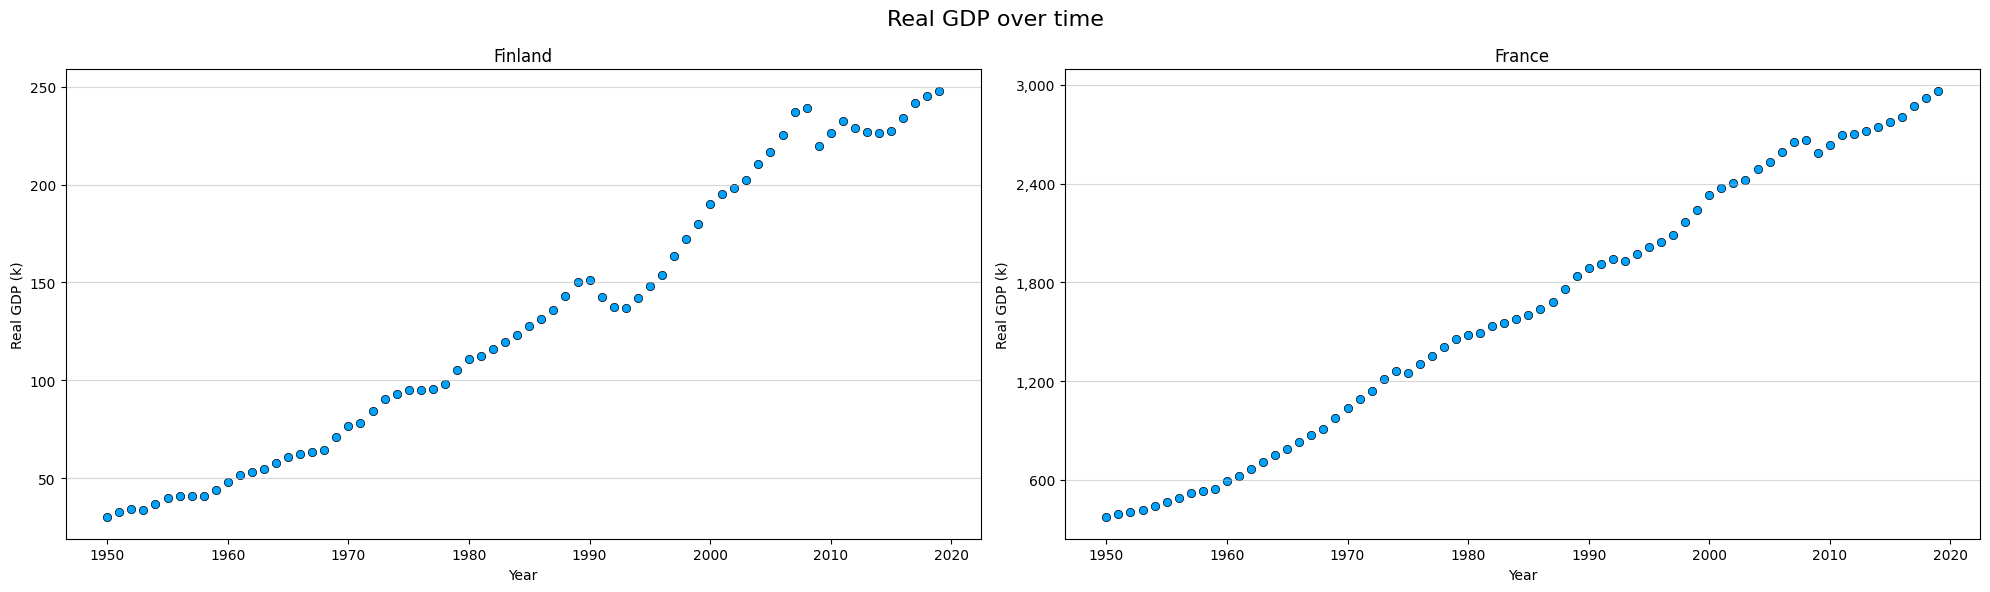

In [ ]:
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle("Real GDP over time", fontsize=16) # Change title

# Scatter plot for Finland
ax1.scatter(
    finland_data["year"], 
    finland_data["Real GDP"] / 1e3, # Remove 0s
    facecolor="#00a2ff", 
    edgecolor='black', 
    linewidth=0.5
)

ax1.set_title("Finland")
ax1.set_xlabel("Year")
ax1.set_ylabel("Real GDP (k)")
ax1.grid(axis="y", alpha=0.5) # Change grid line
ax1.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=5)) # Equal number of steps

# Scatter plot for France
ax2.scatter(
    france_data["year"], 
    france_data["Real GDP"] / 1e3, # Remove 0s
    facecolor="#00a2ff", 
    edgecolor='black', 
    linewidth=0.5
)

ax2.set_title("France")
ax2.set_xlabel("Year")
ax2.set_ylabel("Real GDP (k)")
ax2.grid(axis="y", alpha=0.5) # Change grid line
ax2.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=5)) # Equal number of steps

plt.tight_layout()
plt.show()

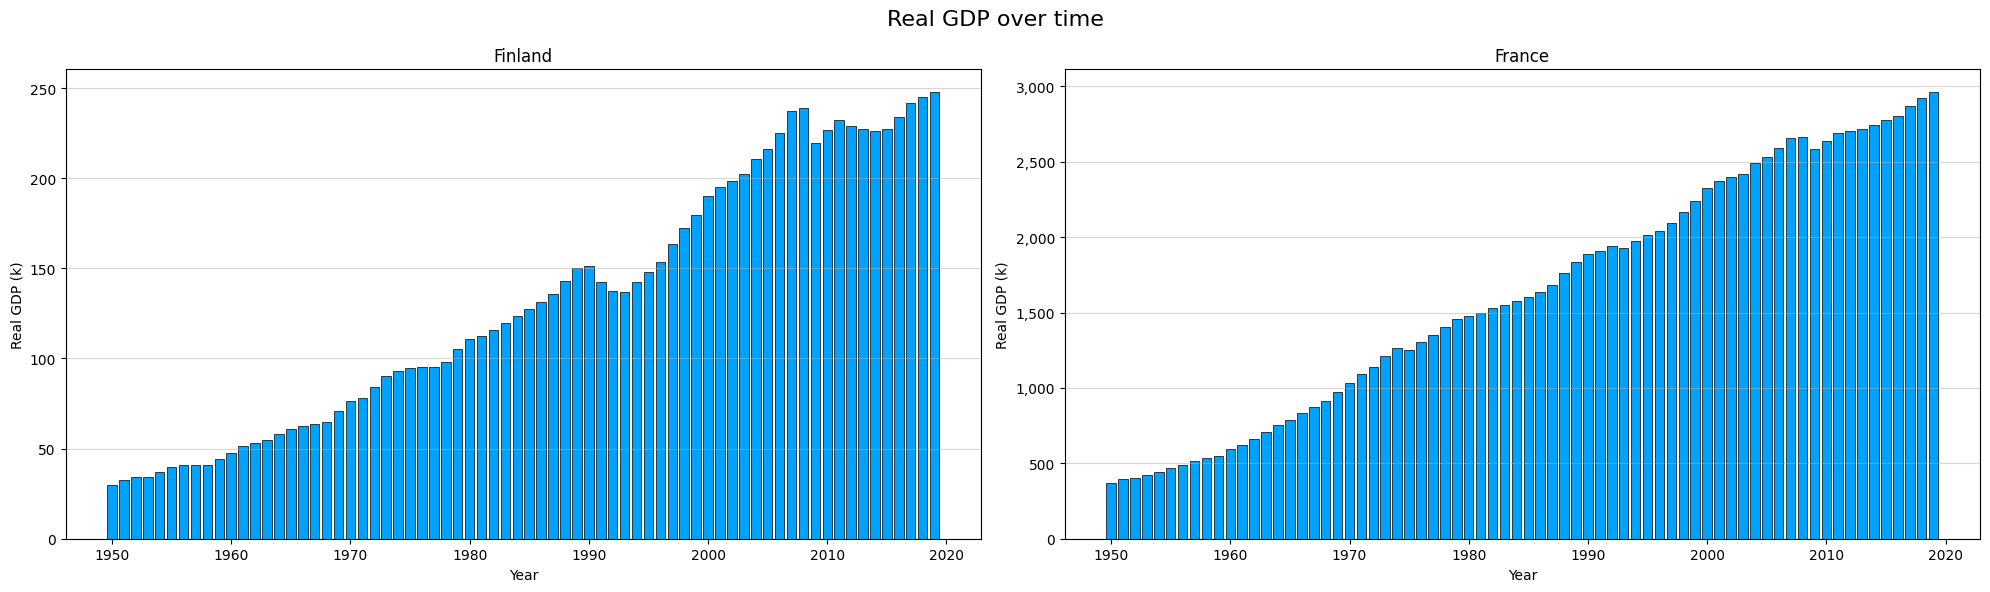

In [ ]:
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle("Real GDP over time", fontsize=16) # Change title

# Bar plot for Finland
ax1.bar(
    finland_data["year"], 
    finland_data["Real GDP"] / 1e3, # Remove 0s
    facecolor="#00a2ff", 
    edgecolor="black", 
    linewidth=0.5
)

ax1.set_title("Finland")
ax1.set_xlabel("Year")
ax1.set_ylabel("Real GDP (k)")
ax1.grid(axis="y", alpha=0.5) # Change grid line
ax1.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=5)) # Equal number of steps

# Bar plot for France
ax2.bar(
    france_data["year"], 
    france_data["Real GDP"] / 1e3, # Remove 0s
    facecolor="#00a2ff", 
    edgecolor="black", 
    linewidth=0.5
)

ax2.set_title("France")
ax2.set_xlabel("Year")
ax2.set_ylabel("Real GDP (k)")
ax2.grid(axis="y", alpha=0.5) # Change grid line
ax2.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=5)) # Equal number of steps

plt.tight_layout()
plt.show()

### 3.2 Lines of Best Fit 

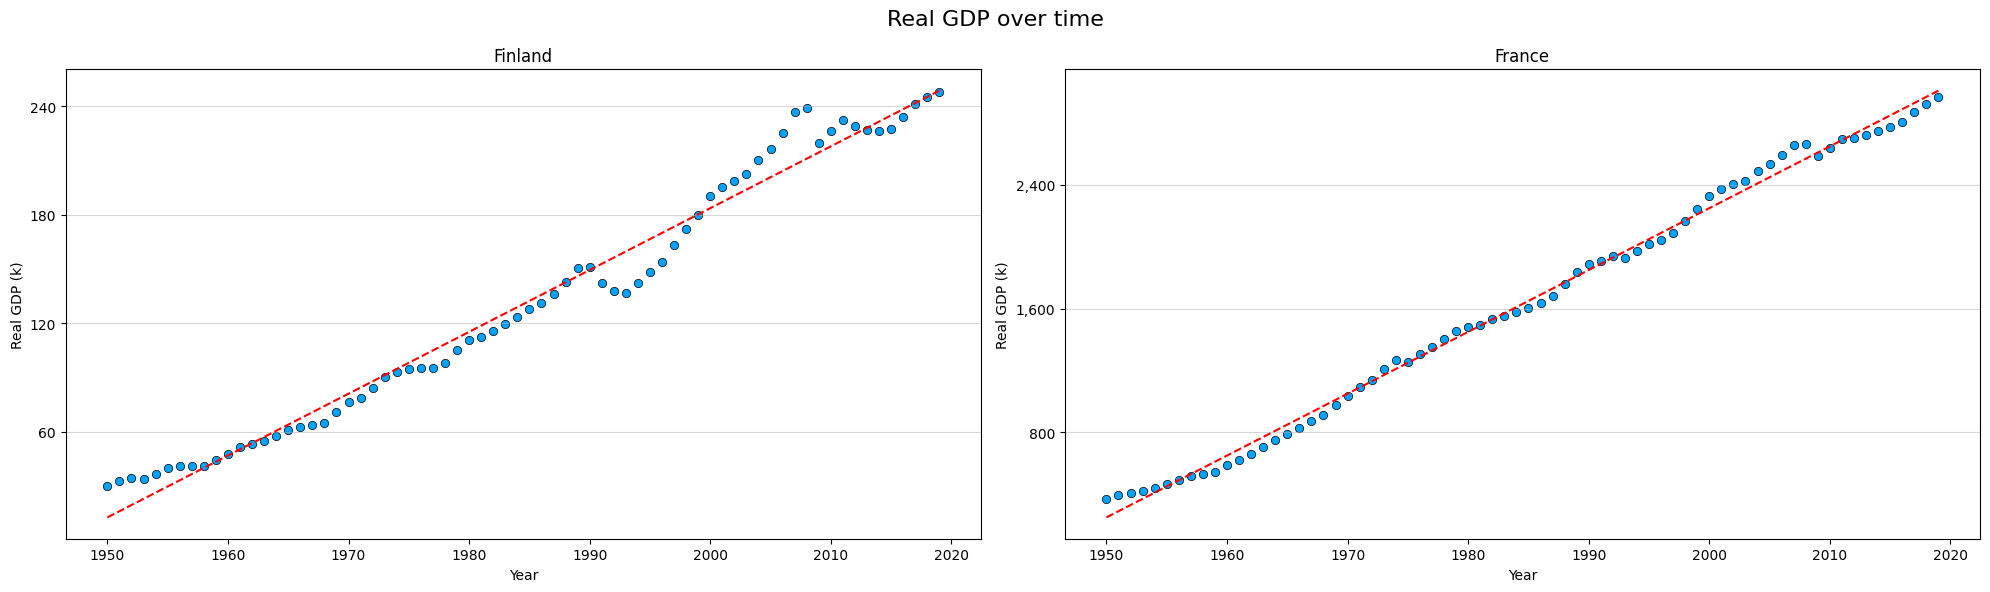

In [ ]:
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle("Real GDP over time", fontsize=16) # Change title

# Scatter plot for Finland
ax1.scatter(
    finland_data["year"], 
    finland_data["Real GDP"] / 1e3, # Remove 0s
    facecolor="#00a2ff", 
    edgecolor="black", 
    linewidth=0.5
)

ax1.set_title("Finland")
ax1.set_xlabel("Year")
ax1.set_ylabel("Real GDP (k)")
ax1.grid(axis="y", alpha=0.5) # Change grid line
ax1.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=5)) # Equal number of steps

# Linear regression line for Finland
x = finland_data["year"]
y = finland_data["Real GDP"] / 1e3  
m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x + b, color='red', linestyle='--')

# Scatter plot for France
ax2.scatter(
    france_data["year"], 
    france_data["Real GDP"] / 1e3, # Remove 0s
    facecolor="#00a2ff", 
    edgecolor="black", 
    linewidth=0.5
)

ax2.set_title("France")
ax2.set_xlabel("Year")
ax2.set_ylabel("Real GDP (k)")
ax2.grid(axis="y", alpha=0.5) # Change grid line
ax2.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=5)) # Equal number of steps

# Linear regression line for France
x = france_data["year"]
y = france_data["Real GDP"] / 1e3  
m, b = np.polyfit(x, y, 1)
ax2.plot(x, m*x + b, color='red', linestyle='--')

plt.tight_layout()
plt.show()

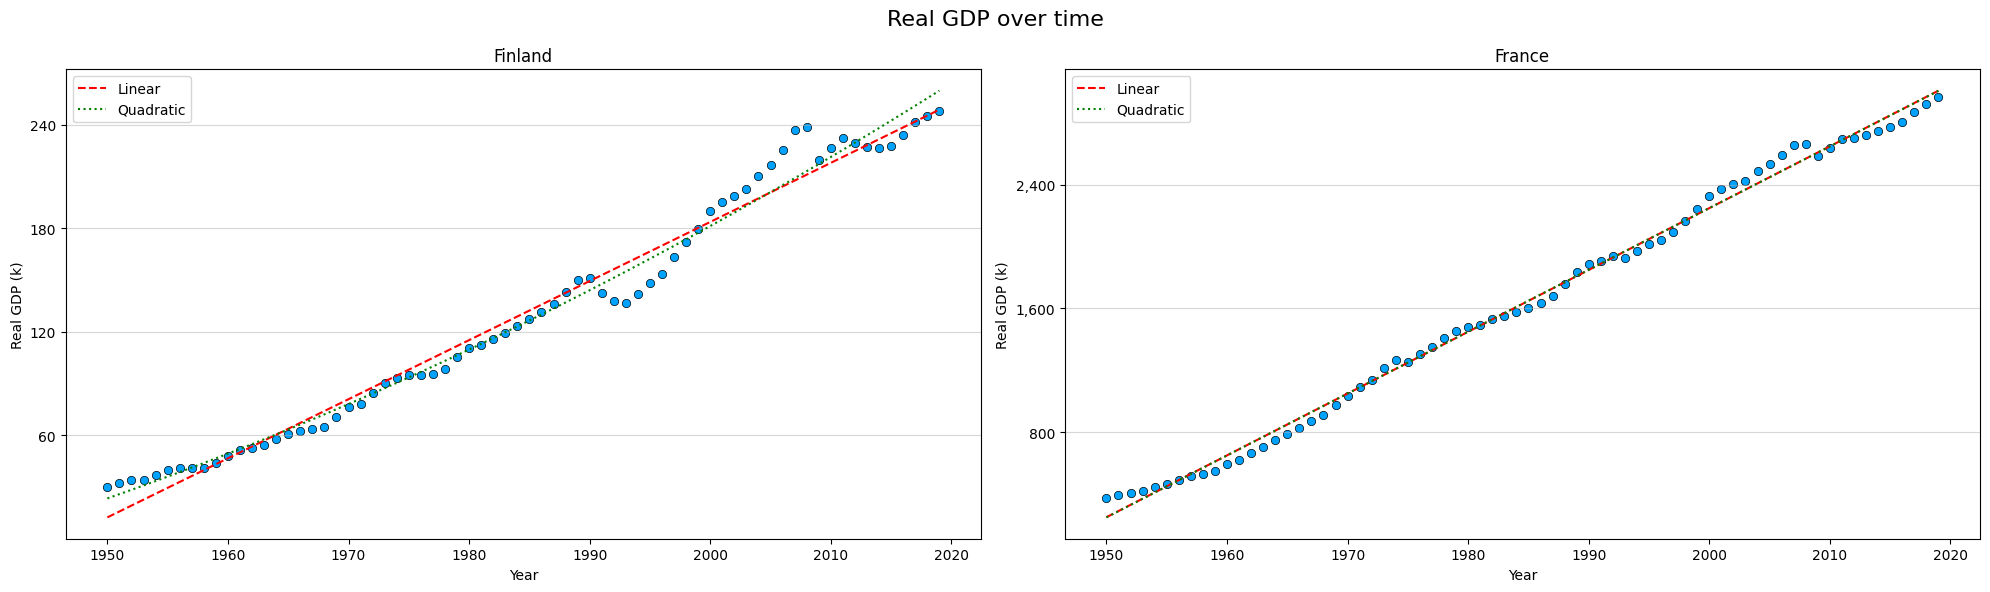

In [99]:
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle("Real GDP over time", fontsize=16) # Change title

# Scatter plot for Finland
ax1.scatter(
    finland_data["year"], 
    finland_data["Real GDP"] / 1e3, # Remove 0s
    facecolor="#00a2ff", 
    edgecolor="black", 
    linewidth=0.5
)

ax1.set_title("Finland")
ax1.set_xlabel("Year")
ax1.set_ylabel("Real GDP (k)")
ax1.grid(axis="y", alpha=0.5) # Change grid line
ax1.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=5)) # Equal number of steps

# Linear regression line for Finland
x = finland_data["year"]
y = finland_data["Real GDP"] / 1e3  
coefficients_linear = np.polyfit(x, y, 1)  # Linear fit
coefficients_quadratic = np.polyfit(x, y, 2)  # Quadratic fit
ax1.plot(x, np.polyval(coefficients_linear, x), color="red", linestyle="--", label="Linear")
ax1.plot(x, np.polyval(coefficients_quadratic, x), color="green", linestyle=":", label="Quadratic")
ax1.legend()  # Show legend

# Scatter plot for France
ax2.scatter(
    france_data["year"], 
    france_data["Real GDP"] / 1e3, # Remove 0s
    facecolor="#00a2ff", 
    edgecolor="black", 
    linewidth=0.5
)

ax2.set_title("France")
ax2.set_xlabel("Year")
ax2.set_ylabel("Real GDP (k)")
ax2.grid(axis="y", alpha=0.5) # Change grid line
ax2.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=5)) # Equal number of steps

# Linear regression line for France
x = france_data["year"]
y = france_data["Real GDP"] / 1e3  
coefficients_linear = np.polyfit(x, y, 1)  # Linear fit
coefficients_quadratic = np.polyfit(x, y, 2)  # Quadratic fit
ax2.plot(x, np.polyval(coefficients_linear, x), color="red", linestyle="--", label="Linear")
ax2.plot(x, np.polyval(coefficients_quadratic, x), color="green", linestyle=":", label="Quadratic")
ax2.legend()  # Show legend

plt.tight_layout()
plt.show()

### 3.3 Messing Around 

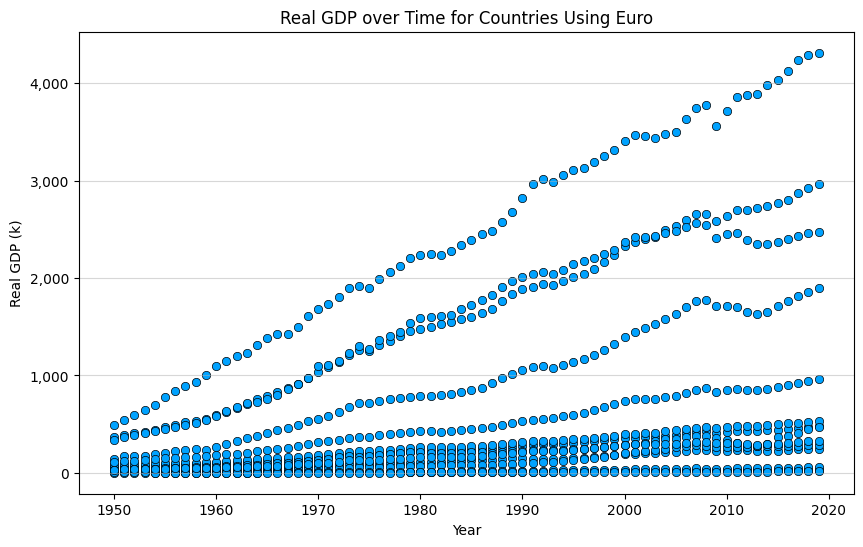

In [101]:
# Filter data where currency_unit is Euro
euro_data = df[df["currency_unit"] == "Euro"]

# Create the scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(
    euro_data["year"], 
    euro_data["Real GDP"] / 1e3,
    facecolor= "#00a2ff", 
    edgecolor="black", 
    linewidth=0.5
)

ax.set_title("Real GDP over Time for Countries Using Euro")
ax.set_xlabel("Year")
ax.set_ylabel("Real GDP (k)")

ax.grid(axis='y', alpha=0.5)
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

plt.show()